## SET A

### Q1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
diabetes_data = pd.read_csv(r"F:\RohanPracticals\DataMining\Rohan_RProgramming\Python\diabetes.csv")
diabetes_data.head()

In [ ]:
diabetes_data.info()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=3)

In [ ]:
x = diabetes_data.drop(columns='Outcome')
y = diabetes_data.iloc[:,-1]
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=3)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 8))

plot_tree(clf, feature_names=x.columns, filled=True, fontsize=8)

### Q2

In [ ]:
dataset = pd.DataFrame(data = {
    "Age": [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45],
    "Experience": [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9],
    "Rank": [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9],
    "Nationality": ["UK", "USA", "N", "USA", "USA", "UK", "N", "UK", "N", "N", "USA", "UK", "UK"],
    "Go": ["NO", "NO", "NO", "NO", "YES", "NO", "YES", "YES", "YES", "YES", "NO", "YES", "YES"]
}
)
dataset.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Nationality'] = encoder.fit_transform(dataset['Nationality'])
dataset['Go'] = encoder.fit_transform(dataset['Go'])

In [ ]:
x_c = dataset.drop(columns="Go")
y_c = dataset.iloc[:,-1]

In [ ]:
x_c_train, x_c_test, y_c_train, y_c_test = train_test_split(x_c, y_c, test_size=0.10, stratify=y_c, random_state=3)

In [ ]:
dataset.head()

In [ ]:
clf1 = DecisionTreeClassifier(max_depth=4)

In [ ]:
clf1.fit(x_c_train, y_c_train)

In [ ]:
y_c_pred = clf1.predict(x_c_test)

In [ ]:
features = np.array([[40, 10, 7, 2]])
prediction = clf1.predict(features)
if prediction == 0:
    prediction = "No"
else:
    prediction = "Yes"

print("Predicted value: ", prediction)

In [ ]:
print(classification_report(y_c_test, y_c_pred))

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(clf1, feature_names=x_c.columns, class_names=['No', 'Yes'], filled=True)

## SET B

### Q1

In [ ]:
weather = pd.DataFrame({
    "Weather": [
        "Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast",
        "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"
    ],
    "Temperature": [
        "Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool",
        "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"
    ],
    "Play": [
        "No", "No", "Yes", "Yes", "Yes", "No", "Yes",
        "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"
    ]
}
)

In [ ]:
weather.head()

In [ ]:
weather['Weather'] = encoder.fit_transform(weather['Weather'])
weather['Temperature'] = encoder.fit_transform(weather['Temperature'])
weather['Play'] = encoder.fit_transform(weather['Play'])

In [ ]:
weather

In [ ]:
x_w = weather.drop(columns='Play')
y_w = weather.iloc[:, -1]

In [ ]:
y_w.value_counts()

In [ ]:
x_w_train, x_w_test, y_w_train, y_w_test = train_test_split(x_w, y_w, test_size=0.10, stratify=y_w, random_state=13)

In [ ]:
print(y_w_train.value_counts())
print(y_w_test.value_counts())

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data=weather)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x_w_train, y_w_train)
y_w_pred = nb.predict(x_w_test)

In [ ]:
particular_predict = nb.predict([[2, 2]])
print(particular_predict)

In [ ]:
print(classification_report(y_w_test, y_w_pred))

## SET C

### Q1

In [353]:
cancer_df = pd.read_csv('Cancer_Data.csv', index_col=False)
cancer_df.head()
# cancer_df.shape

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [354]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [370]:
# cancer_df.drop(columns=['id', 'Unnamed: 32'], inplace = True)
# cancer_df.drop(columns=['radius_mean', 'perimeter_mean'], inplace = True)
cancer_df.drop(columns=['radius_worst', 'perimeter_worst'], inplace = True)

In [371]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   texture_mean             569 non-null    float64
 2   area_mean                569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   concavity_mean           569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   symmetry_mean            569 non-null    float64
 8   fractal_dimension_mean   569 non-null    float64
 9   radius_se                569 non-null    float64
 10  texture_se               569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  smoothness_se            569 non-null    float64
 14  compactness_se           5

In [372]:
correlation_mat = cancer_df.iloc[:, 1:].corr()

<Axes: >

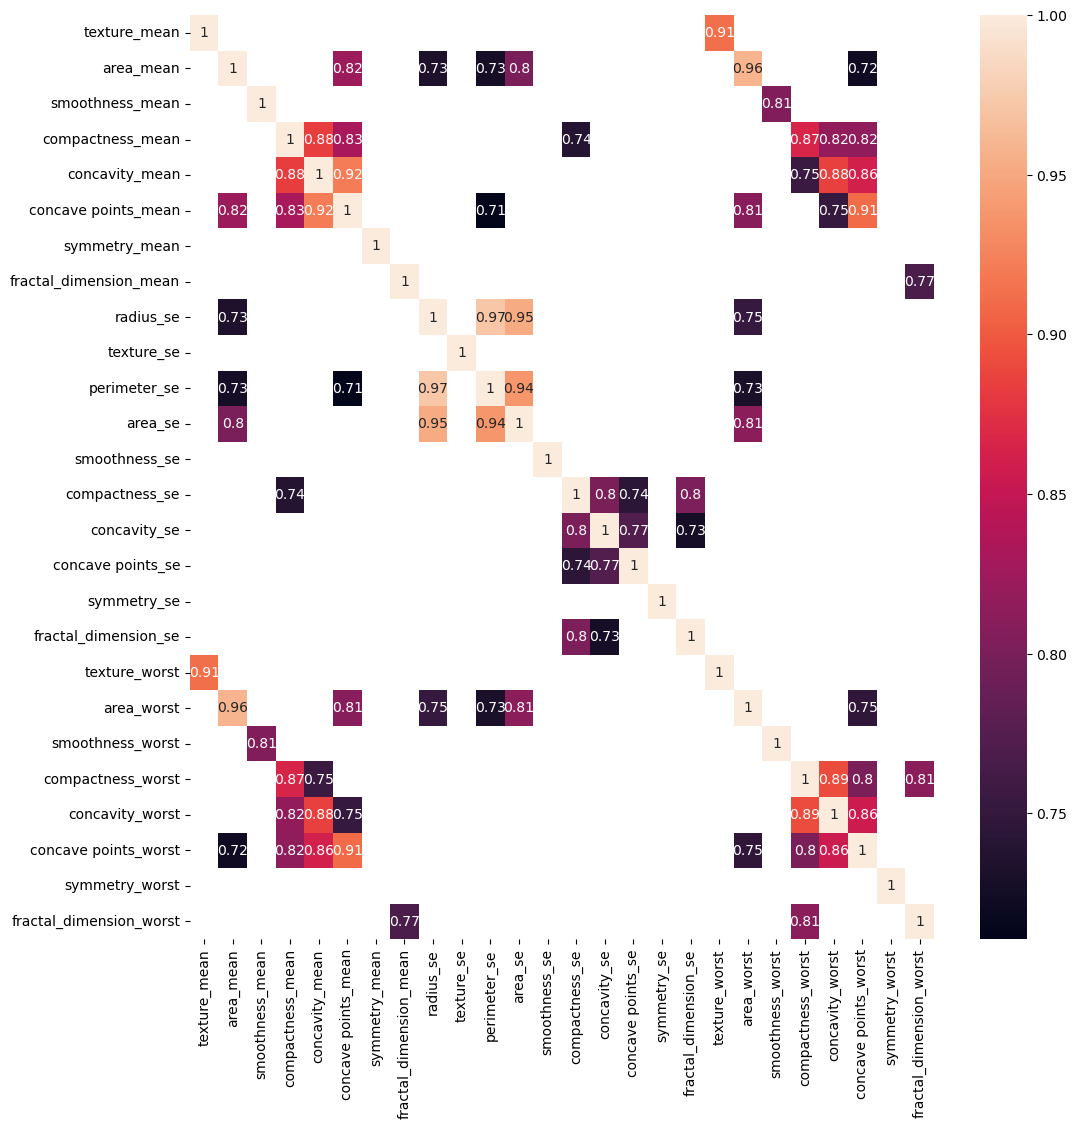

In [373]:
plt.figure(figsize=(12, 12))
sns.heatmap(data = correlation_mat[correlation_mat >= 0.7], annot=True)

In [376]:
x_bc = cancer_df.drop(columns='diagnosis')
y_bc = cancer_df.iloc[:, :1]
y_bc

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [377]:
x_bc_train, x_bc_test, y_bc_train, y_bc_test = train_test_split(x_bc, y_bc, test_size=0.20, stratify=y_bc, random_state=3)

In [378]:
from sklearn.svm import SVC

In [379]:
svc = SVC(kernel='linear')

In [381]:
svc.fit(x_bc_train, y_bc_train)
y_bc_pred = svc.predict(x_bc_test)

c:\Users\Admin\New folder\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [382]:
print(classification_report(y_bc_test, y_bc_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

